In [69]:
from qiskit import *
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
from qiskit_aer import Aer

1.1. How can we characterize the state of Bobs qubit alone

We can characterize the state of Bobs qubit if use a CX(target=0, control=1) and a CZ(target=0, control=2) gate
for the qubits\
q_0 = superposition qubit (Bob)\
q_1 = Bellstate qubit (Alice)\
q_2 = Bellstate qubit (Alice)


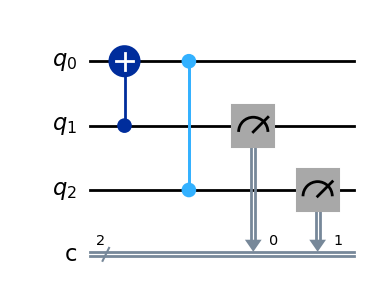

In [70]:
qc = QuantumCircuit(3,2)
qc.cx(1,0)
qc.cz(2,0)
qc.measure([1,2],[0,1])

qc.draw(output='mpl')


1.2. What entanglement measure can quantify how entangled is Bobs qubit with Alices qubits? Calculate this measure.

To measure the entanglement we can calculate the Von Neumann entanglement entropy. Done on Ipad. Maximum entanglement $S =  -ln(1/2) = 1$

1.3. Now Alice measures her two qubits in the computational basis. What happens to Bob's qubit? Is is possible for Bob to infer the state $ \ket{\Psi} $, without having Alice communicate the result of her measurement to him?

Bob's qubit is no longer entangled with Alice's qubits and collapses into one state. It is not possible for Bob to infer the state $\ket{\Psi}$, without having Alice communicate the result of her measurement to him. It looks possible in the shown circuit because of the principle of deferred measurement, where control gates are being used which cannot be used unless both qubits are locally close together, which they are not. Therefore Bob has the $4$ possible states of his qubits and needs Alice measurement to know which operations he needs to do or which state he has.

2.1.1 Using the JW mapping of the creation and annihilation operators $a_i^{\dagger}$ and $a_j$ to qubit operators, write the Hamiltonian in Eq.(3) in terms of tensor products of Pauli operators $\hat{X}$, $\hat{Y}$, $\hat{Z}$ and identity $\hat{1}$

JW mapping\
$a_{i}^{\dagger} = \left(\prod_{j=2L-1}^{i+1} \hat{Z}_{j} \right) \frac{\hat{X}_{i}-i\hat{Y}_{i}}{2}$

$a_{i} = \left(\prod_{j=2L-1}^{i+1} \hat{Z}_{j} \right) \frac{\hat{X}_{i}+i\hat{Y}_{i}}{2}$

$\hat{n}_{i} = a_{i}^{\dagger}a_{i} = \frac{\hat{X}_{i}-i\hat{Y}_{i}}{2}\frac{\hat{X}_{i}+i\hat{Y}_{i}}{2} = \frac{\hat{1}_{i}-\hat{Z}_{i}}{2}$

Eq.(3):\
$\hat{H} = -J \sum_{l=0}^{L-2} \sum_{s=\uparrow, \downarrow} \left(a_{l,s}^{\dagger}a_{l+1,s} + a_{l+1,s}^{\dagger}a_{l,s} \right) + U \sum_{l=0}^{L-1} \hat{n}_{l,\uparrow}\hat{n}_{l,\downarrow}$

$\hat{H} = -J \sum_{i=0}^{2L-3}\left(a_{i}^{\dagger}a_{i+2} + a_{i+2}^{\dagger}a_{i} \right) + U \sum_{i=0}^{2L-1} \hat{n}_{i}\hat{n}_{i+1}$

$\hat{H} = -J \sum_{i=0}^{2L-3} \left(\left(\prod_{j=2L-1}^{i+1} \hat{Z}_{j} \right) \frac{\hat{X}_{i}-i\hat{Y}_{i}}{2} \otimes \left(\prod_{j=2L-1}^{i+1+2} \hat{Z}_{j} \right) \frac{\hat{X}_{i+2}+i\hat{Y}_{i+2}}{2}         + \left(\prod_{j=2L-1}^{i+1+2} \hat{Z}_{j} \right) \frac{\hat{X}_{i+2}-i\hat{Y}_{i+2}}{2} \otimes \left(\prod_{j=2L-1}^{i+1} \hat{Z}_{j} \right) \frac{\hat{X}_{i}+i\hat{Y}_{i}}{2}    \right)+ U \sum_{i=0}^{2L-1} \frac{\hat{1}_{i}\hat{1}_{i+1}-\hat{Z}_{i+1}-\hat{Z}_{i}+\hat{Z}_{i}\hat{Z}_{i+1}}{4} $

$\hat{H} = -J \sum_{i=0}^{2L-3} \left(\hat{Z}_{i+1} \hat{Z}_{i+2}  \frac{\hat{X}_{i}\hat{X}_{i+2}+\hat{Y}_{i}\hat{Y}_{i+2}}{2} \right)+ U \sum_{i=0}^{2L-1} \frac{\hat{1}_{i}\hat{1}_{i+1}-\hat{Z}_{i+1}-\hat{Z}_{i}+\hat{Z}_{i}\hat{Z}_{i+1}}{4} $

2.2.1 What is the expression of the time-evolution operator $U_{LO}(t)$ approximated witha leading-order (LO) Trotter expansion?

$U_{LO}(t) = \left(\prod_{k=1}^L U_k(\Delta _t) \right)^{N_s} = \left(\prod_{k=1}^L e^{-iH_k(\Delta _t)} \right)^{N_s}$

$U_{LO}(t) = \left(\prod_{i=0}^{2L-3} e^{+i\frac{J}{2}\hat{Z}_{i+1}\hat{Z}_{i+2}\hat{X}_{i}\hat{X}_{i+2}(\Delta _t)} e^{+i\frac{J}{2}\hat{Z}_{i+1}\hat{Z}_{i+2}\hat{Y}_{i}\hat{Y}_{i+2}(\Delta _t)} * \prod_{i=0}^{2L-1} e^{-i*\frac{U}{4}\hat{1}_{i}\hat{1}_{i+1}(\Delta _t)} * e^{+i*\frac{U}{4}\hat{1}_{i}\hat{Z}_{i+1}(\Delta _t)} * e^{+i*\frac{U}{4}\hat{Z}_{i}\hat{1}_{i+1}(\Delta _t)} * e^{-i*\frac{U}{4}\hat{Z}_{i}\hat{Z}_{i+1}(\Delta _t)}\right)^{N_s}$

In [124]:
J = 1.
U = 3.
Qbits = 8
def exp_xx(dt, i, qc=QuantumCircuit(Qbits)):
    qc.h(i)
    qc.h(i+2)

    # CNOT-Kaskade für vier-Pauli-Term
    qc.cx(i, i+1)
    qc.cx(i+2, i+1)
    qc.cx(i+1, i+2)

    # Phase-Rotation
    qc.rz(-J * dt, i+2)

    # Rücktransformation
    qc.cx(i+1, i+2)
    qc.cx(i+2, i+1)
    qc.cx(i, i+1)

    # Basis zurück
    qc.h(i)
    qc.h(i+2)

    return qc

def exp_yy(dt, i, qc=QuantumCircuit(Qbits)):
    qc.sdg(i)
    qc.sdg(i+2)
    qc.h(i)
    qc.h(i+2)

    # CNOT-Kaskade
    qc.cx(i, i+1)
    qc.cx(i+2, i+1)
    qc.cx(i+1, i+2)

    # Phase-Rotation
    qc.rz(-J * dt, i+2)

    # Rücktransformation
    qc.cx(i+1, i+2)
    qc.cx(i+2, i+1)
    qc.cx(i, i+1)

    # Z → Y durch H S
    qc.h(i)
    qc.h(i+2)
    qc.s(i)
    qc.s(i+2)

    return qc

def exp_11(dt, i, qc=QuantumCircuit(Qbits)):
    qc.global_phase += -U * dt/4

    return qc

def exp_1z(dt, i, qc=QuantumCircuit(Qbits)):
    qc.rz(U * dt/2,i+1)
    
    return qc

def exp_z1(dt, i, qc=QuantumCircuit(Qbits)):
    qc.rz(U * dt/2,i)
    
    return qc

def exp_zz(dt, i, qc=QuantumCircuit(Qbits)):
    # qc.cx(i, i+1)
    qc.rzz(U * dt/2, i, i+1)
    # qc.cx(i, i+1)
    return qc


In [125]:
def Trotter_evol(ini_state, t, Ns):
    L = Qbits//2
    dt = t/Ns
    qc = QuantumCircuit(Qbits)

    # implement (e^{-iH Delta_t})^N_s to leading order
    for iteration in range(Ns):
        for k in range(2*int(L)-2):
            qc = exp_xx(dt, k, qc)
            qc = exp_yy(dt, k, qc)
        for k in range(2*int(L)-1):
            qc = exp_11(dt, k, qc)
            qc = exp_1z(dt, k, qc)
            qc = exp_z1(dt, k, qc)
            qc = exp_zz(dt, k, qc)
        
    evolved_state = ini_state.compose(qc)
        
    return evolved_state

ini_state = QuantumCircuit(Qbits)
ini_state.x([0,1,2,5])

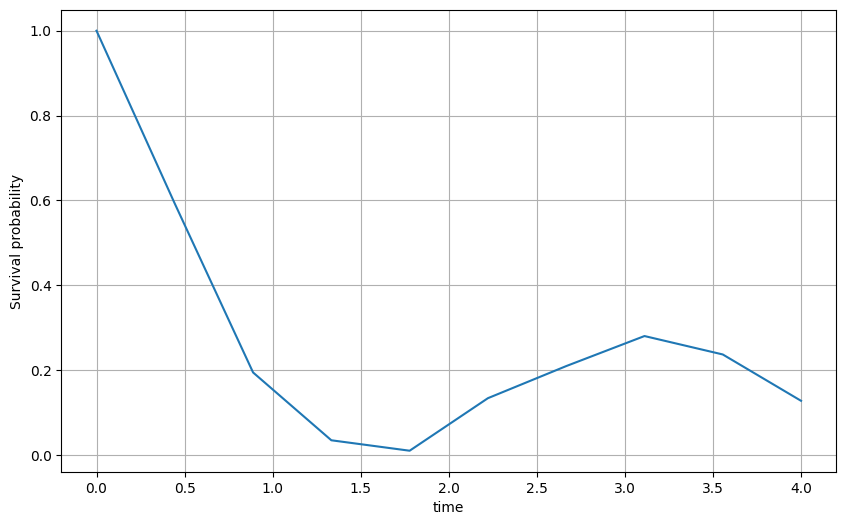

In [126]:
import numpy as np
cr = ClassicalRegister(Qbits)
qc = Trotter_evol(ini_state, 4, 3)
qc.measure_all()

initial_state = '00100111'
def P_meas(t, Ns, tot_shots=5000):
    qc = Trotter_evol(ini_state, t, Ns)
    qc.measure_all()
    simulator = Aer.get_backend('aer_simulator')
    tot_shots=tot_shots
    trans_circuit = transpile(qc, backend=simulator)
    job = simulator.run(trans_circuit, shots=tot_shots)
    counts = job.result().get_counts(qc)
    p0 = counts.get(initial_state, 0)/tot_shots
    return p0

t = np.linspace(0, 4, 10)
p_array = []
for l in t:
    p_array.append(P_meas(l,7))
plt.figure(figsize=(10,6))
plt.plot(t, p_array)
plt.xlabel('time')
plt.ylabel('Survival probability')
plt.grid(True)

In [ ]:
def exact_evo(t,ini_state, tot_shots=500):
    qc = ini_state.copy()
    qc.compose(Trotter_evol(qc,t,1), inplace=True)
    return qc

initial_state = '00100111'
def P_meas_exact(t, ini_state, tot_shots=500):
    qc = exact_evo(t, ini_state)
    qc.measure_all()
    simulator = Aer.get_backend('aer_simulator')
    trans_circuit = transpile(qc, backend=simulator)
    job = simulator.run(trans_circuit, shots=tot_shots)
    counts = job.result().get_counts(qc)
    p = counts.get(initial_state, 0)/tot_shots
    return p

ini_state = QuantumCircuit(8)
ini_state.x([0,1,2,5])
P_meas_exact(2.5, ini_state=ini_state)

from qiskit.quantum_info import SparsePauliOp
from scipy.linalg import eigh

def create_U_exact(initial_state, t): # initial state in an int
    L = Qbits//2
    U = 3.
    summe = SparsePauliOp(['I'*2*L], [0])
    for i in range(2*L-2):
        pauli_string_x = 'I'*i + "XZX" + 'I' * (5-i)
        pauli_string_y = 'I'*i + "YZY" + 'I' * (5-i)
        summe += SparsePauliOp([pauli_string_x, pauli_string_y], [-J/2, -J/2])
    hamltonian_1 = summe
    
    # create H_0
    summe_0 = SparsePauliOp(['I'*2*L], [0])
    for i in range(L):
        pauli_string_1 = 'I'*i + "ZI" + 'I' * (6-i)
        pauli_string_2 = 'I'*i + "IZ" + 'I' * (6-i)
        pauli_string_3 = 'I'*i + "ZZ" + 'I' * (6-i)
        summe_0 += SparsePauliOp([pauli_string_1, pauli_string_2, pauli_string_3], [-U/4,-U/4, U/4])
    hamiltonian_0 = summe_0
    h = hamiltonian_0 + hamltonian_1
    h_matrix = np.array(h.to_matrix(), dtype=complex)
    eigvals, eigvecs = eigh(h_matrix)
    #print(eigvals)
    #print(eigvecs)
    V = eigvecs @ np.diag(np.exp(complex(0,-1)*eigvals * t)) @ eigvecs.conj().T

    return abs(V[initial_state][initial_state])**2

def p0_exact(initial_state_int, time):
    p0_exact = []
    for index_time in range(50):
        t = time/50*index_time
        survival_probability = create_U_exact(initial_state=initial_state_int, t=t)
        p0_exact.append(survival_probability)
    return p0_exact

In [132]:
t_values = np.linspace(0, 4, 50)
trotter_steps_list = [3, 10, 20]

ini_state = QuantumCircuit(Qbits)
ini_state.x([0,1,2,5])

plt.figure(figsize=(10, 6))
# exact_probs = []

# # Exakte Lösung
# for t in t_values:
#     psi_exact = exact_evolution(H, psi0, t)
#     exact_probs.append(survival_proba(psi0, psi_exact))

exact_probs = []
for t in t_values:
    exact_probs.append(p0_exact(initial_state_int=ini_state, time=t))

plt.plot(t_values, exact_probs, label="Exact", color='black', linewidth=2)

# Trotter-Approximationen
for Ns in trotter_steps_list:
    trotter_probs = []
    for t in t_values:
        trotter_probs.append(P_meas(t=t, Ns=Ns))
        # trotter_circuit = trotter_evolution(ini_state, t, Ns)

    plt.plot(t_values, trotter_probs, label=f"Trotter N={Ns}")

plt.xlabel("Time t")
plt.ylabel("Survival Probability $P(t)$")
plt.title("Survival Probability: Trotter vs Exact")
plt.legend()
plt.grid()
plt.show()

C:\Users\Felix Schunder\AppData\Local\Temp\ipykernel_29956\2882018273.py:50: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  return abs(V[initial_state][initial_state])**2


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 3) + inhomogeneous part.

<Figure size 1000x600 with 0 Axes>

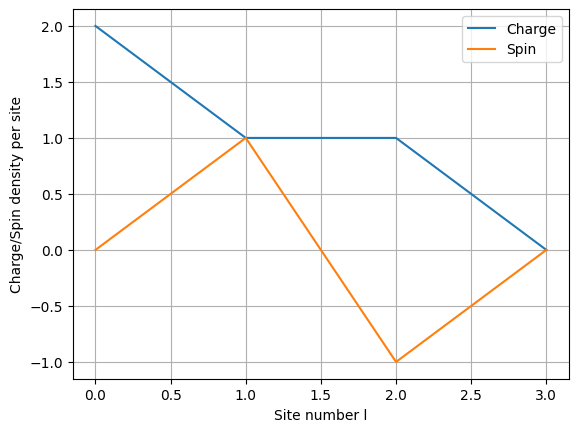

In [76]:
p_charge_dic = {'00':'0', '01':'1','10':'1','11':'2'}
p_spin_dic = {'00':'0', '01':'1','10':'-1','11':'0'}

def Density(l, ini_state, tot_shots=500):
    qc = ini_state.copy()
    cr = ClassicalRegister(2)
    qc.add_register(cr)
    qc.measure(l,0)
    qc.measure(l+1,1)
    simulator = Aer.get_backend('aer_simulator')
    tot_shots=tot_shots
    trans_circuit = transpile(qc, backend=simulator)
    job = simulator.run(trans_circuit, shots=tot_shots)
    obs = job.result().get_counts().most_frequent()
    # data = job.result().data()
    return int(p_charge_dic[obs]), int(p_spin_dic[obs])
ini_state = QuantumCircuit(8)
ini_state.x([0,1,2,5])
charge_array = []
spin_array = []
for i in range(0,len(ini_state.qubits),2):
    charge, spin = Density(i, ini_state)
    charge_array.append(charge)
    spin_array.append(spin)

l = [0,1,2,3]
plt.plot(l, charge_array, label='Charge')
plt.plot(l, spin_array, label='Spin')
plt.xlabel('Site number l')
plt.ylabel('Charge/Spin density per site')
plt.grid(True)
plt.legend()
plt.show()

QiskitError: 'Multiple values have the same maximum counts: 11,10'

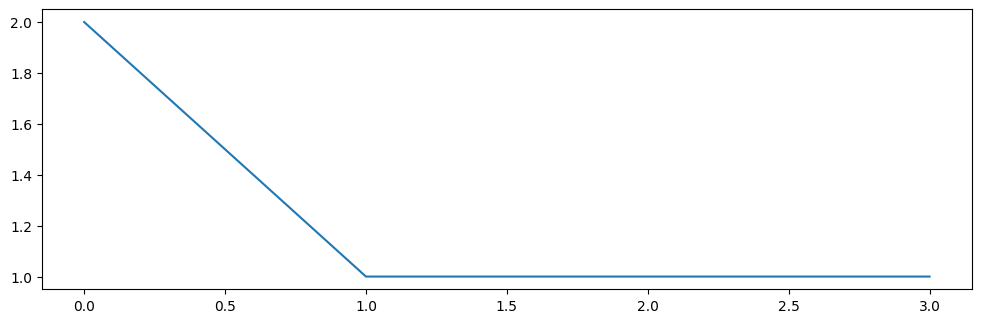

In [77]:
ini_state = QuantumCircuit(8)
ini_state.x([0,1,2,5])
def P_trotter_evol(Ns):
    qc = trotter_evolution(ini_state, t=2.5, Ns=Ns)
    charge_array = []
    spin_array = [] 
    for i in range(0,len(ini_state.qubits),2):
        charge, spin = Density(i, qc)
        charge_array.append(charge)
        spin_array.append(spin)
    return charge_array, spin_array

def P_exact_evol(ini_state):
    qc = exact_evo(t=2.5, ini_state=ini_state)
    charge_array = []
    spin_array = [] 
    for i in range(0,len(ini_state.qubits),2):
        charge, spin = Density(i, qc)
        charge_array.append(charge)
        spin_array.append(spin)
    return charge_array, spin_array
    
charge_exact, spin_exact = P_exact_evol(ini_state)

l = [0,1,2,3]
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
for N in [3,5,7]:
    charge_trott, spin_trott = P_trotter_evol(N)
    plt.plot(l, charge_trott, label=f'Charge Ns={N}')
plt.plot(l, charge_exact, label='Charge exact')
plt.xlabel('Site number l')
plt.ylabel('Charge density per site')
plt.grid(True)
plt.legend()
plt.subplot(2,1,2)
for N in [3,5,7]:
    charge_trott, spin_trott = P_trotter_evol(N)
    plt.plot(l, spin_trott, label=f'Spin Ns={N}')
plt.plot(l, spin_exact, label='spin exact')
plt.xlabel('Site number l')
plt.ylabel('Spin density per site')
plt.grid(True)
plt.legend()
plt.show()
# exact_evolution(H, psi0, 2.5)
